#### Dataset: CIFAR-10 

##### Image Classification using LeNet architecture with data augmentation

This notebook outlines the process of utilizing a pre-trained ResNet18 model to classify images from the CIFAR-10 dataset. Initial steps involve preparing and augmenting the dataset with techniques like random cropping and flipping to enhance model generalization. The model is adapted for CIFAR-10 by modifying its final layer, followed by specifying the training configuration including loss function and optimizer, focusing on optimizing the newly added layer. The training loop iterates over the dataset, adjusting model weights based on computed gradients to minimize loss. Finally, the model's accuracy is assessed on a separate test set, demonstrating its ability to classify CIFAR-10 images effectively.

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

# Data augmentation techniques for the training set
transform_train = transforms.Compose(
    [transforms.RandomCrop(32, padding=4),  # Randomly crop images with padding of 4
     transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
     transforms.ToTensor(),  # Convert images to PyTorch tensors
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Normalize images

# Transformations for the test set (no data augmentation)
transform_test = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Loading and transforming the CIFAR10 training dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

# Loading and transforming the CIFAR10 test dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

# Load a pre-trained ResNet18 model and freeze its parameters
model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False  # Freeze model parameters to prevent training

# Customize the model by replacing the last layer to fit CIFAR10 (10 classes)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)  # Adjust for 10 output classes

# Setup for training: device selection, loss function, and optimizer
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # Use GPU if available
model = model.to(device)
criterion = nn.CrossEntropyLoss()  # Loss function for classification
optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)  # Optimizer for the last layer

# Training loop: iterating over epochs and batches, calculating loss, and updating model parameters
import time
start_time = time.time()
for epoch in range(20):  # Number of epochs
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Clear gradients

        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update parameters

        running_loss += loss.item()
        if i % 200 == 199:  # Logging the loss every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished training in %.3f seconds' % (time.time() - start_time))  # Print training time

# Testing loop: calculate and print the accuracy of the model on the test set
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))  # Print accuracy
print('Finished testing in %.3f seconds' % (time.time() - start_time))  # Print testing time


Files already downloaded and verified
Files already downloaded and verified


c:\Users\mimis\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\mimis\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[1,   200] loss: 2.081
[1,   400] loss: 1.813
[1,   600] loss: 1.792
[2,   200] loss: 1.750
[2,   400] loss: 1.717
[2,   600] loss: 1.724
[3,   200] loss: 1.707
[3,   400] loss: 1.688
[3,   600] loss: 1.702
[4,   200] loss: 1.689
[4,   400] loss: 1.683
[4,   600] loss: 1.684
[5,   200] loss: 1.693
[5,   400] loss: 1.682
[5,   600] loss: 1.693
[6,   200] loss: 1.686
[6,   400] loss: 1.680
[6,   600] loss: 1.672
[7,   200] loss: 1.672
[7,   400] loss: 1.695
[7,   600] loss: 1.676
[8,   200] loss: 1.665
[8,   400] loss: 1.673
[8,   600] loss: 1.681
[9,   200] loss: 1.676
[9,   400] loss: 1.687
[9,   600] loss: 1.662
[10,   200] loss: 1.682
[10,   400] loss: 1.663
[10,   600] loss: 1.677
[11,   200] loss: 1.680
[11,   400] loss: 1.688
[11,   600] loss: 1.685
[12,   200] loss: 1.675
[12,   400] loss: 1.677
[12,   600] loss: 1.676
[13,   200] loss: 1.672
[13,   400] loss: 1.672
[13,   600] loss: 1.682
[14,   200] loss: 1.670
[14,   400] loss: 1.673
[14,   600] loss: 1.673
[15,   200] loss: 1

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix

model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true += labels.cpu().numpy().tolist()
        y_pred += predicted.cpu().numpy().tolist()

cm = confusion_matrix(y_true, y_pred)
print(cm)

# Print accuracy
accuracy = 100 * correct / total
print(f"Accuracy: {accuracy:.2f}%")

[[397  52 127  55  41  13  15  16 240  44]
 [ 41 565  34  64  16  28  19  24 101 108]
 [ 86  69 364  94 123  46 107  21  73  17]
 [ 25 107  94 389  77 113  83  35  38  39]
 [ 33  32 105  99 469  27 117  49  42  27]
 [ 19  99  86 218  67 322  47  57  32  53]
 [  9  55 103 105 133  48 473  27  23  24]
 [ 59  62  73 113 137  54  39 346  47  70]
 [119  84  48  49  38  14  22  10 566  50]
 [ 55 250  26  66  35  26  20  60 121 341]]
Accuracy: 41.61%


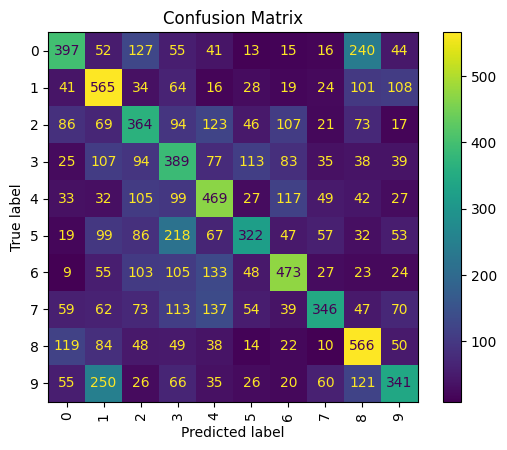

42.32

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sample confusion matrix data
confusion_matrix_data = np.array([[397, 52, 127, 55, 41, 13, 15, 16, 240, 44],
                                  [41, 565, 34, 64, 16, 28, 19, 24, 101, 108],
                                  [86, 69, 364, 94, 123, 46, 107, 21, 73, 17],
                                  [25, 107, 94, 389, 77, 113, 83, 35, 38, 39],
                                  [33, 32, 105, 99, 469, 27, 117, 49, 42, 27],
                                  [19, 99, 86, 218, 67, 322, 47, 57, 32, 53],
                                  [9, 55, 103, 105, 133, 48, 473, 27, 23, 24],
                                  [59, 62, 73, 113, 137, 54, 39, 346, 47, 70],
                                  [119, 84, 48, 49, 38, 14, 22, 10, 566, 50],
                                  [55, 250, 26, 66, 35, 26, 20, 60, 121, 341]])

# Calculate accuracy
total_correct = np.trace(confusion_matrix_data)
total_predictions = np.sum(confusion_matrix_data)
accuracy = total_correct / total_predictions * 100

# Plot confusion matrix
labels = list(range(10))  # Assuming 10 classes
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=labels)
cmd.plot(values_format='d', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

accuracy


The confusion matrix visualizes the performance of a classification model across 10 classes, with values indicating the number of predictions for each actual class versus the predicted class. Here are some insights based on the matrix:

The diagonal elements represent correct predictions for each class (true positives), with the highest numbers indicating better performance for specific classes. For example, the model performed best in classifying class 1 (565 correct predictions) and class 8 (566 correct predictions).

Off-diagonal elements show the misclassifications. For instance, class 0 images were often misclassified as class 8 (240 instances), indicating possible similarities or confusions between these classes according to the model.

The overall accuracy of the model, calculated as the sum of true positives divided by the total number of predictions, is approximately 42.32%. This suggests that the model has a moderate level of accuracy in correctly identifying the classes among the 10 possible outcomes. The goal in improving this model would be to increase the diagonal values (correct predictions) while reducing the off-diagonal values (misclassifications), possibly through techniques such as more data, improved model architecture, or better training strategies.